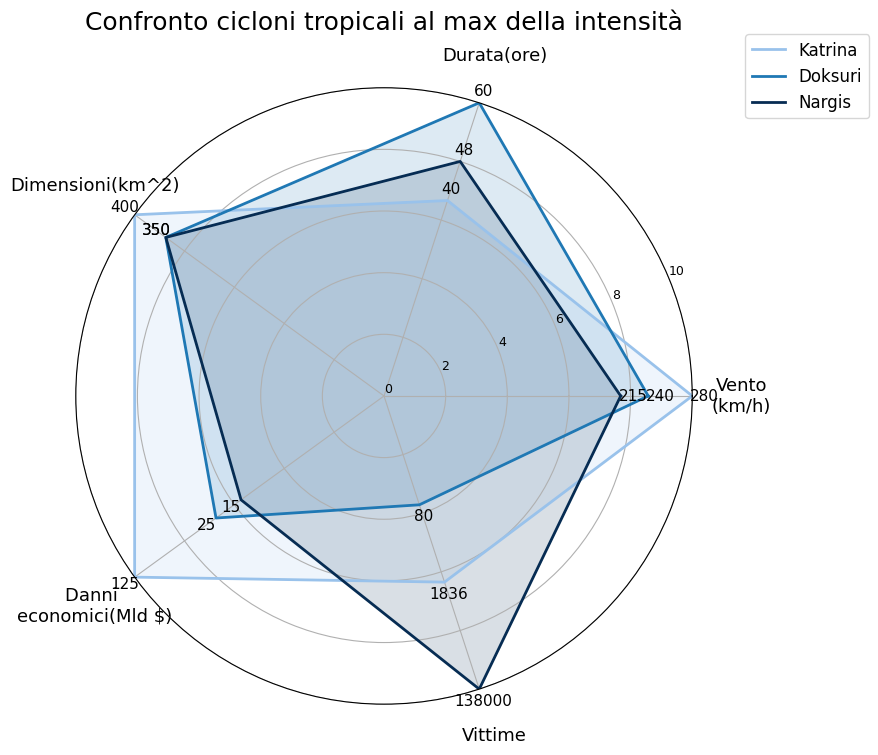

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/casi_confronto.csv')

categorie = ['Vento\n(km/h)', 'Durata(ore)', 'Dimensioni(km^2)', 'Danni \neconomici(Mld $)', 'Vittime']
categorie_colonne = df.columns[1:]  
num_var = len(categorie)


df['Vittime_log'] = np.log1p(df['Vittime'])
vittime_norm = df['Vittime_log'] / df['Vittime_log'].max() * 10

df['Danni_log'] = np.log1p(df['Danni economici (Mld $)'])
danni_norm = df['Danni_log'] / df['Danni_log'].max() * 10

colonne_lineari = ['Vento (km/h)', 'Durata (ore)', 'Dimensioni (km^2)']
massimi = df[colonne_lineari].max()
altre_norm = df[colonne_lineari].divide(massimi) * 10

valori_norm = altre_norm.copy()
valori_norm['Danni economici (Mld $)'] = danni_norm
valori_norm['Vittime'] = vittime_norm


angoli = np.linspace(0, 2 * np.pi, num_var, endpoint=False).tolist()
angoli += angoli[:1]

plt.figure(figsize=(9, 9))
ax = plt.subplot(111, polar=True)


palette_blu = ['#99c2eb', '#1f78b4', '#062c53']

for i, (idx, row) in enumerate(df.iterrows()):
    nome = row['Nome']
    reali = row[categorie_colonne].tolist()
    norm = valori_norm.loc[idx].tolist()
    
    reali += reali[:1]
    norm += norm[:1]
    
    colore = palette_blu[i % len(palette_blu)]
    
    ax.plot(angoli, norm, label=nome, linewidth=2, color=colore)
    ax.fill(angoli, norm, alpha=0.15, color=colore)
    
    for j in range(num_var):
        ax.text(angoli[j], norm[j] + 0.4, f"{int(reali[j])}",
                color='black', ha='center', va='center', fontsize=11)

ax.set_xticks(angoli[:-1])
ax.set_xticklabels(categorie, fontsize=13)
ax.xaxis.set_tick_params(pad=25)
ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.set_yticklabels(['0', '2', '4', '6', '8', '10'], fontsize=9)
ax.set_ylim(0, 10)
ax.grid(True)
ax.set_title('Confronto cicloni tropicali al max della intensità',
             fontsize=18, y=1.08)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
plt.tight_layout()
plt.show()
